<a href="https://colab.research.google.com/github/VanTam23/CKAI/blob/main/Project_Final_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Thêm các thư viện cần thiết
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
# xử lý dữ liệu
train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/DataFood/'

In [ ]:
# load dữ liệu
train_data = train.flow_from_directory('/content/drive/MyDrive/DataFood/Training',
                                       target_size = (150,150),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/DataFood/Validation',
                                       target_size = (150,150),
                                       class_mode = 'categorical')


Found 1050 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [ ]:
#Định nghĩa model
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
#  Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Thực hiện train model với data
history = model.fit(train_data,epochs=20,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/20
33/33 [==============================] - 369s 11s/step - loss: 3.7801 - accuracy: 0.0810 - val_loss: 2.6713 - val_accuracy: 0.0667
Epoch 2/20
33/33 [==============================] - 9s 279ms/step - loss: 2.5238 - accuracy: 0.1400 - val_loss: 2.2537 - val_accuracy: 0.1400
Epoch 3/20
33/33 [==============================] - 9s 276ms/step - loss: 2.0240 - accuracy: 0.2610 - val_loss: 1.7206 - val_accuracy: 0.4000
Epoch 4/20
33/33 [==============================] - 9s 278ms/step - loss: 1.8025 - accuracy: 0.3733 - val_loss: 1.4490 - val_accuracy: 0.5167
Epoch 5/20
33/33 [==============================] - 9s 277ms/step - loss: 1.4903 - accuracy: 0.5076 - val_loss: 1.2237 - val_accuracy: 0.6833
Epoch 6/20
33/33 [==============================] - 9s 277ms/step - loss: 1.3264 - accuracy: 0.5638 - val_loss: 1.0202 - val_accuracy: 0.6933
Epoch 7/20
33/33 [==============================] - 9s 278ms/step - loss: 1.2062 - accuracy: 0.5943 - val_loss: 0.9073 - val_accuracy: 0.7033
Epoch 

In [ ]:
model.save("tam1.h5")
#model_json = model.to_json()
#with open("model_arch.json", "w") as json_file:
 #   json_file.write(model_json)
#model.save_weights("model_weights.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

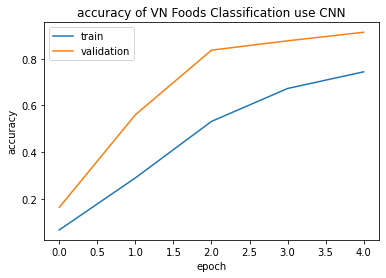

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of VN Foods Classification use CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

Text(0.5, 1.0, 'Bò Né')

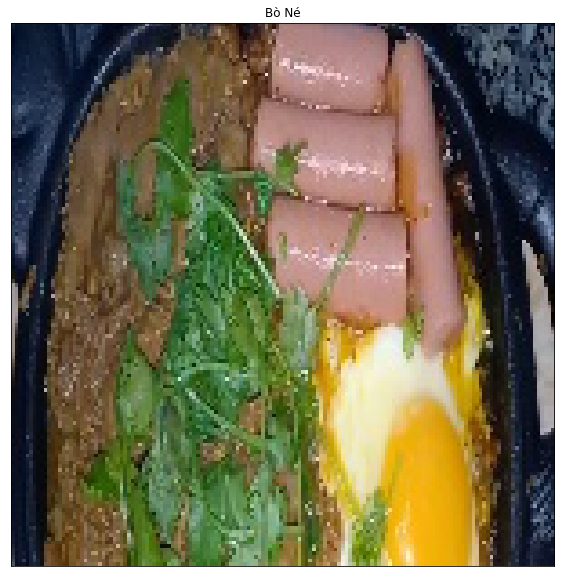

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['Bánh Khoai Mỡ','Bánh Tiêu','Bánh Tráng nướng','Bánh Ướt','Bánh Xèo','Bò Né','Bún Xào','Cá Viên Chiên','Chân Gà Nướng','Goi Cuon','Hột Vịt Lộn','Óc Hương','Phá Lấu','Phở Bò','Súp Cua' ]
dir = '/content/drive/MyDrive/DataFood/Testing'
plt.figure(figsize=(10,10))
img = load_img(dir +'/BoNe_029.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
image = img/255.0
plt.xticks([])
plt.yticks([])
plt.title(names[np.argmax(model.predict(image))])

Text(0.5, 1.0, 'Bánh Khoai Mỡ')

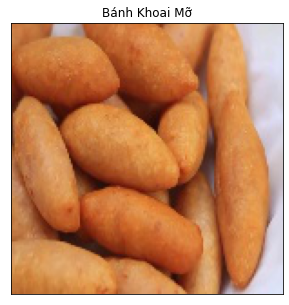

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['Bánh Khoai Mỡ','Bánh Tiêu','Bánh Tráng nướng','Bánh Ướt','Bánh Xèo','Bò Né','Bún Xào','Cá Viên Chiên','Chân Gà Nướng','Goi Cuon','Hột Vịt Lộn','Óc Hương','Phá Lấu','Phở Bò','Súp Cua' ]
dir = '/content/drive/MyDrive/DataFood/Testing'
plt.figure(figsize=(5,5))
img = load_img(dir +'/BanhKhoaiMo_063.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
image = img/255.0
plt.xticks([])
plt.yticks([])
plt.title(names[np.argmax(model.predict(image))])

Text(0.5, 1.0, 'Bánh Ướt')

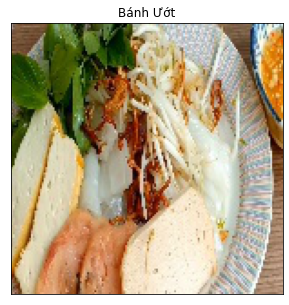

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['Bánh Khoai Mỡ','Bánh Tiêu','Bánh Tráng nướng','Bánh Ướt','Bánh Xèo','Bò Né','Bún Xào','Cá Viên Chiên','Chân Gà Nướng','Goi Cuon','Hột Vịt Lộn','Óc Hương','Phá Lấu','Phở Bò','Súp Cua' ]
dir = '/content/drive/MyDrive/DataFood/Testing'
plt.figure(figsize=(5,5))
img = load_img(dir +'/BanhUot_034.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
image = img/255.0
plt.xticks([])
plt.yticks([])
plt.title(names[np.argmax(model.predict(image))])

Text(0.5, 1.0, 'Phở Bò')

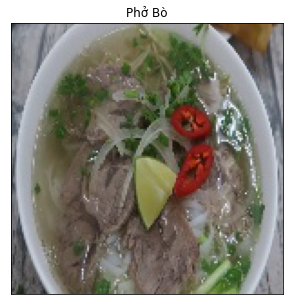

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['Bánh Khoai Mỡ','Bánh Tiêu','Bánh Tráng nướng','Bánh Ướt','Bánh Xèo','Bò Né','Bún Xào','Cá Viên Chiên','Chân Gà Nướng','Goi Cuon','Hột Vịt Lộn','Óc Hương','Phá Lấu','Phở Bò','Súp Cua' ]
dir = '/content/drive/MyDrive/DataFood/Testing'
plt.figure(figsize=(5,5))
img = load_img(dir +'/PhoBo_009.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
image = img/255.0
plt.xticks([])
plt.yticks([])
plt.title(names[np.argmax(model.predict(image))])

In [ ]:
#link data: https://drive.google.com/drive/folders/1FVHAyx4ufZUcWaVj9MFRAw5T7vJd3Qjs?usp=sharing